<a href="https://colab.research.google.com/github/prateekjoshi565/Community_Detection/blob/master/Untitled41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

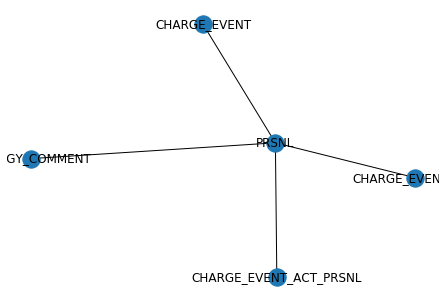

In [78]:
tablemap_df = pd.read_csv('tablemap.csv')
G = nx.Graph()
for index, row in tablemap_df.iterrows():
    src = row['TABLE1']
    dest = row['TABLE2']
    weight = row['TOTAL_AFFINITY']
    G.add_weighted_edges_from([(src,dest,weight)])
                                
nx.draw(G, with_labels = True)

In [79]:
len(G.nodes), len(G.edges)

(5, 4)

In [80]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph, weight="weight")
  edge = ()
  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break
  return edge

In [81]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
    
	sg_count = nx.number_connected_components(graph)
	while(sg_count == 1):
		edge_to_be_removed = edge_to_remove(graph)[0]
		weight_to_be_removed = edge_to_remove(graph)[1]
		#print("edge_to_be_removed : ", edge_to_be_removed)
		#print("weight_to_be_removed : ", weight_to_be_removed)
		graph.remove_edge(edge_to_be_removed, weight_to_be_removed)
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [82]:
# find the nodes forming the communities
node_groups = []


def get_communities(graph):
    
  # find communities in the graph
  c = girvan_newman(graph)
  return c

sb_node_groups = []
def get_node_groups(c):
  #sb_node_groups = []
  for i in c:
    myList = list(i)
    sb_node_groups.append(myList)
    
    #print("SUBGRAPH : " , myList)
    #print("SUBGRAPH LENGTH: " , len(myList))
    if(len(myList)> 3):
      sb_node_groups.remove(myList)
      #print("Length Greater than 2, inside if : ", myList)
    
      subgraph = G.subgraph(myList)
      #print("Subgraph Created : ", myList)
      c_sb = girvan_newman(subgraph.copy())
      #print("Communities for Subgraph Done") 
      
      get_node_groups(c_sb)
        
  return sb_node_groups
    
# find communities in the graph
c = get_communities(G.copy())
node_groups = get_node_groups(c)

print("subgraphs : ", node_groups)


subgraphs :  [['CHARGE_EVENT_ACT_PRSNL', 'PRSNL', 'CHARGE_EVENT_ACT'], ['CHARGE_EVENT'], ['ALLERGY_COMMENT']]


In [83]:
node_groups

[['CHARGE_EVENT_ACT_PRSNL', 'PRSNL', 'CHARGE_EVENT_ACT'],
 ['CHARGE_EVENT'],
 ['ALLERGY_COMMENT']]

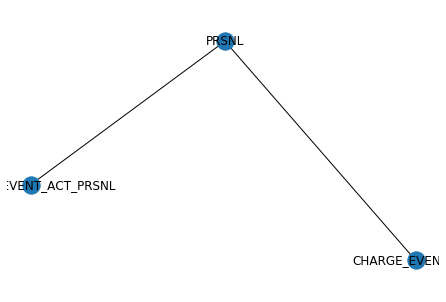

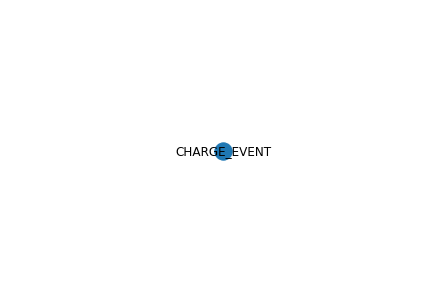

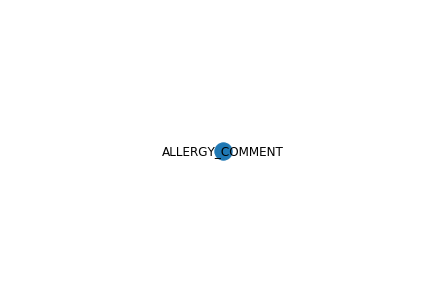

In [84]:
for i in node_groups:
    subgraph = G.subgraph(i)
    nx.draw(subgraph, with_labels=True)
    plt.show()

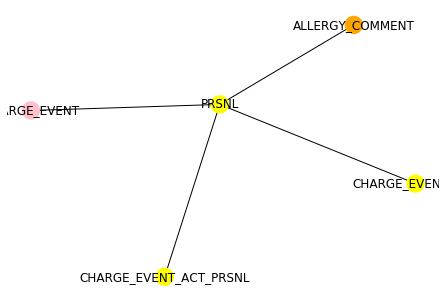

In [85]:
def getIndexOfCluster(node):
    i = 0
    for cluster in node_groups:
        if node in cluster:
            return i
        else:
            i = i + 1
    return 0
        
# plot the communities
#color_list = ['yellow','pink','orange','grey','aqua','red']
color_list = ['yellow','pink','orange','grey','aqua','cornsilk1','darkolivegreen1','lightskyblue1','mediumpurple1','mediumspringgreen','mistyrose1','olivedrab1','paleturquoise1','seagreen1','slategray1','thistle1','blue','red','yellow','pink','orange','grey','blue','red','yellow','pink','orange','grey','aqua','cornsilk1','darkolivegreen1','lightskyblue1','mediumpurple1','mediumspringgreen','mistyrose1','olivedrab1','paleturquoise1','seagreen1','slategray1','thistle1','blue','red','yellow','pink','orange','grey','blue','red']
index = 0

color_map = []
for node in G:
    
    i = getIndexOfCluster(node)
    color_map.append(color_list[i])
#     if node in node_groups[0]:
#         color_map.append('yellow')
#      else: 
#          color_map.append('pink')  
#     index = index +1
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()